In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir("/mnt/aix22301/onj")


def plot_log(file):
    # Load the log file
    with open(f"./log/{file}/log.txt", "r") as f:
        lines = f.readlines()

    # Initialize dictionaries to store parsed values by stream
    streams = {}  # train epoch
    streams2 = {}  # norm valid
    streams3 = {}  # lr auroc

    # Parse the lines, grouping by stream types
    for line in lines:
        step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
        step = int(step)
        val, val2, val3 = float(val), float(val2), float(val3)

        if stream not in streams:
            streams[stream] = {}
        if stream2 not in streams2:
            streams2[stream2] = {}
        if stream3 not in streams3:
            streams3[stream3] = {}

        streams[stream][step] = val
        streams2[stream2][step] = val2
        streams3[stream3][step] = val3

    # Convert streams to sorted lists for plotting
    def convert_to_xy(stream):
        return {k: list(zip(*sorted(v.items()))) for k, v in stream.items()}

    streams_xy = convert_to_xy(streams)
    streams2_xy = convert_to_xy(streams2)
    streams3_xy = convert_to_xy(streams3)

    # Plotting
    num_x, num_y = (2, 2)
    fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))

    # Plot loss and metric
    plt.subplot(num_x, num_y, 1)
    xs, ys = streams_xy["train"]
    plt.plot(xs, ys, label="train loss")

    xs, ys = streams2_xy["valid"]
    plt.plot(xs, ys, label="valid loss")

    xs, ys = streams3_xy["auroc"]
    plt.plot(xs, ys, label="auroc")
    print("Max auroc:", max(ys))

    plt.xlabel("steps")
    plt.ylabel("Cross-Entropy Loss")
    plt.ylim(top=1.2, bottom=0.0)
    plt.legend()
    plt.title("Loss and Metric")

    # Baseline lines
    plt.axhline(y=0.8, color="r", linestyle="--", label="baseline")
    plt.axhline(y=2.0, color="g", linestyle="--", label="baseline")
    plt.axhline(y=0.5, color="b", linestyle="--", label="baseline")

    # Plot gradient norm and learning rate
    plt.subplot(num_x, num_y, 2)
    xs, ys = streams3_xy["lr"]
    ys = np.array(ys) * 1e7  # Convert to NumPy array before scaling
    plt.plot(xs, ys, label="lr")
    plt.xlabel("steps")
    plt.ylabel("Norm Scale (ignore lr scale)")
    plt.ylim(top=100, bottom=0.0)

    xs, ys = streams2_xy["norm"]
    plt.plot(xs, ys, label="norm")
    plt.legend()
    plt.title("Gradient Norm and LR")

    # Plot learning rate
    plt.subplot(num_x, num_y, 3)
    xs, ys = streams3_xy["lr"]
    ys = np.array(ys)  # Convert to NumPy array for consistent plotting
    plt.plot(xs, ys, label="lr")
    plt.legend()
    plt.title("Learning Rate")

    # Plot gradient norm
    plt.subplot(num_x, num_y, 4)
    xs, ys = streams2_xy["norm"]
    ys = np.array(ys)  # Convert to NumPy array for consistent plotting
    plt.plot(xs, ys, label="norm")
    plt.legend()
    plt.title("Gradient Norm")

    plt.tight_layout()
    plt.show()


# Usage example:
# plot_log("2024-11-04_14-59-47_n_embed_512_n_head_8_n_class_2_n_layer_3_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_6_lambda1_0.0_lambda2_1.0_epochs_200_lr_1e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None")

Max auroc: 0.803125


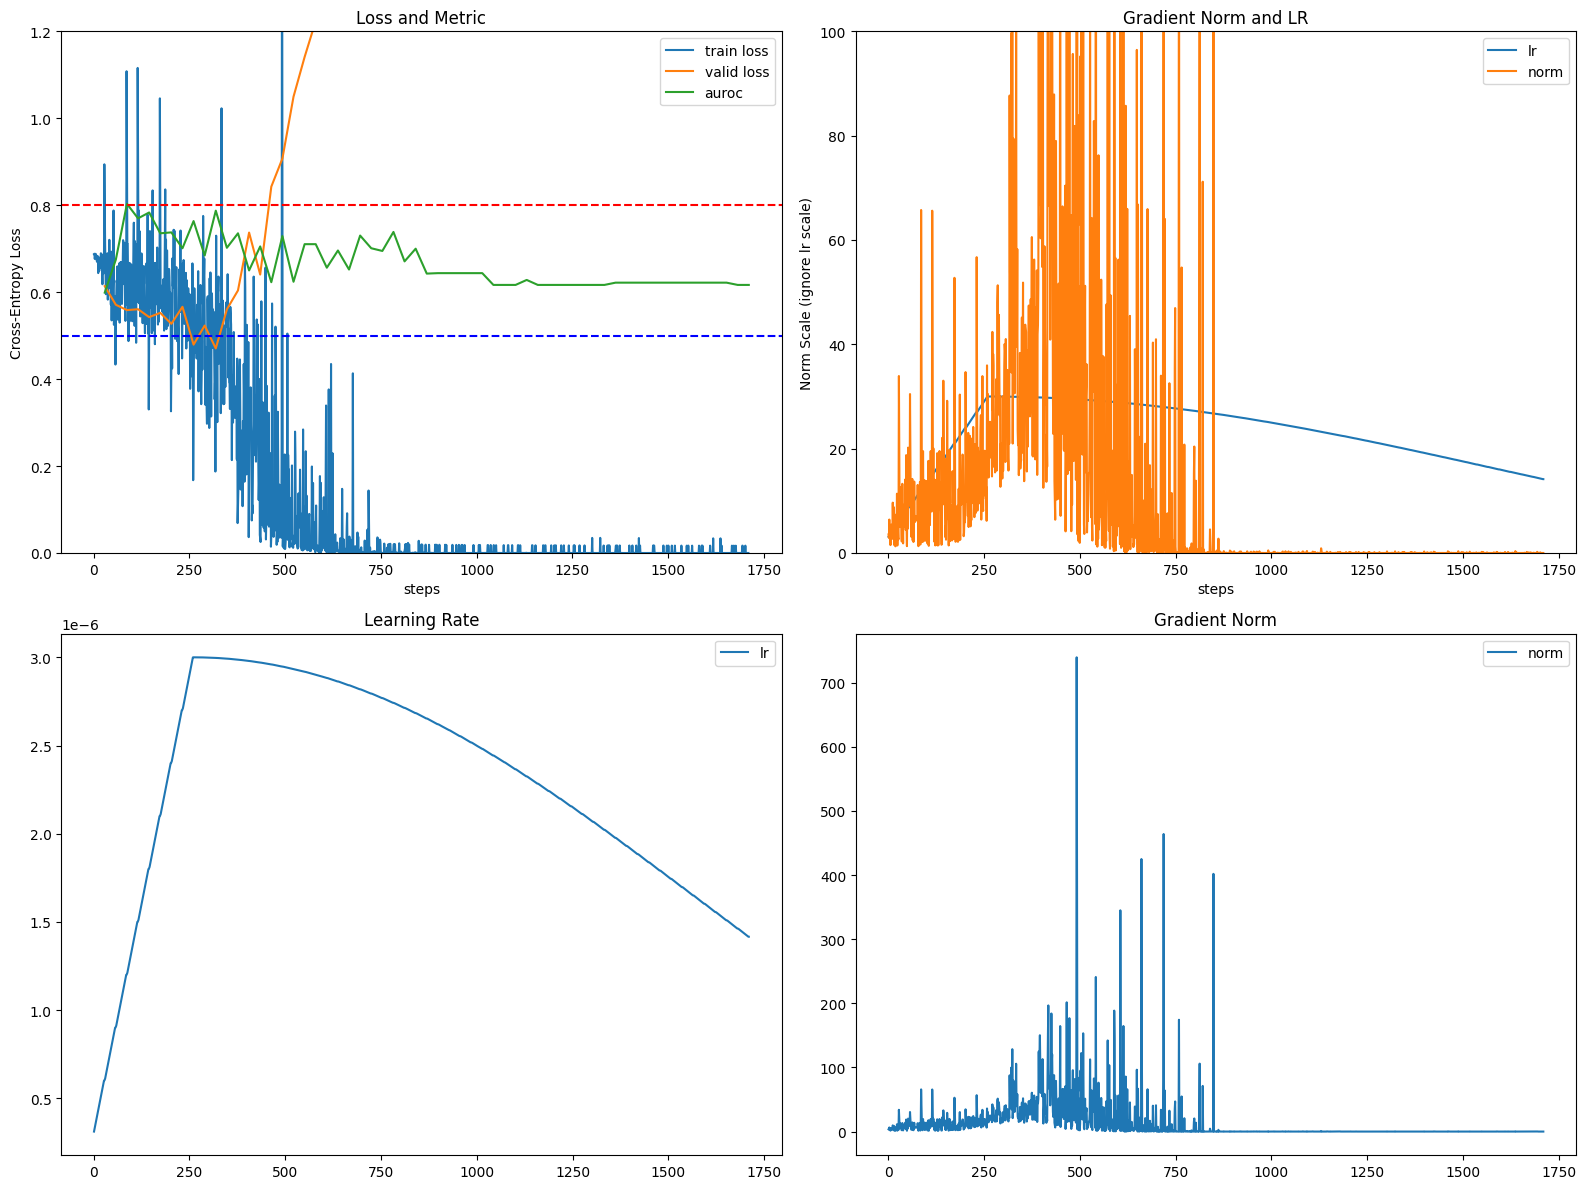

In [ ]:
# plot high feature fusion
plot_log(
    "2024-11-04_10-30-58_resume_False_lr_3e-06_gpu_7_layer_4_batch_16_epochs_100_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_512_head_8_width2d_1024_width3d_512"
)

Max auroc: 0.80625


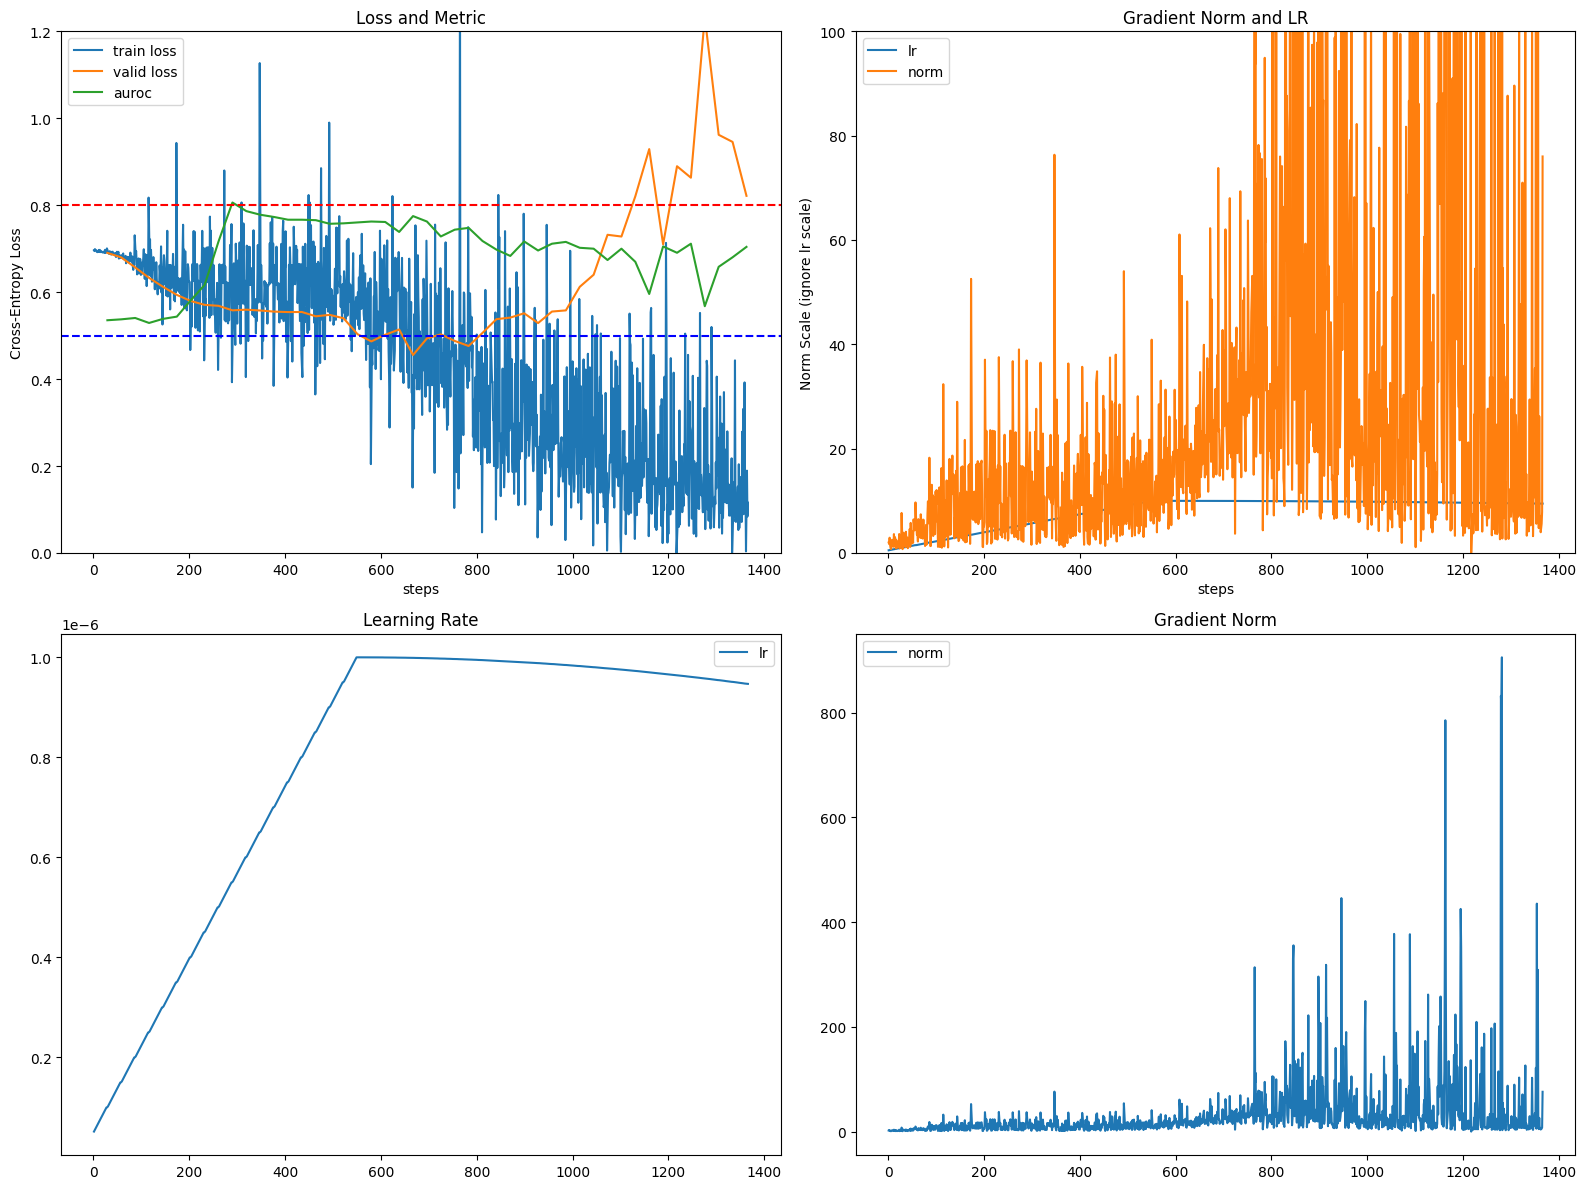

In [ ]:
# plot mid feature fusion

plot_log(
    "2024-11-04_14-59-47_n_embed_512_n_head_8_n_class_2_n_layer_3_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_6_lambda1_0.0_lambda2_1.0_epochs_200_lr_1e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)

Max auroc: 0.8083333333333332


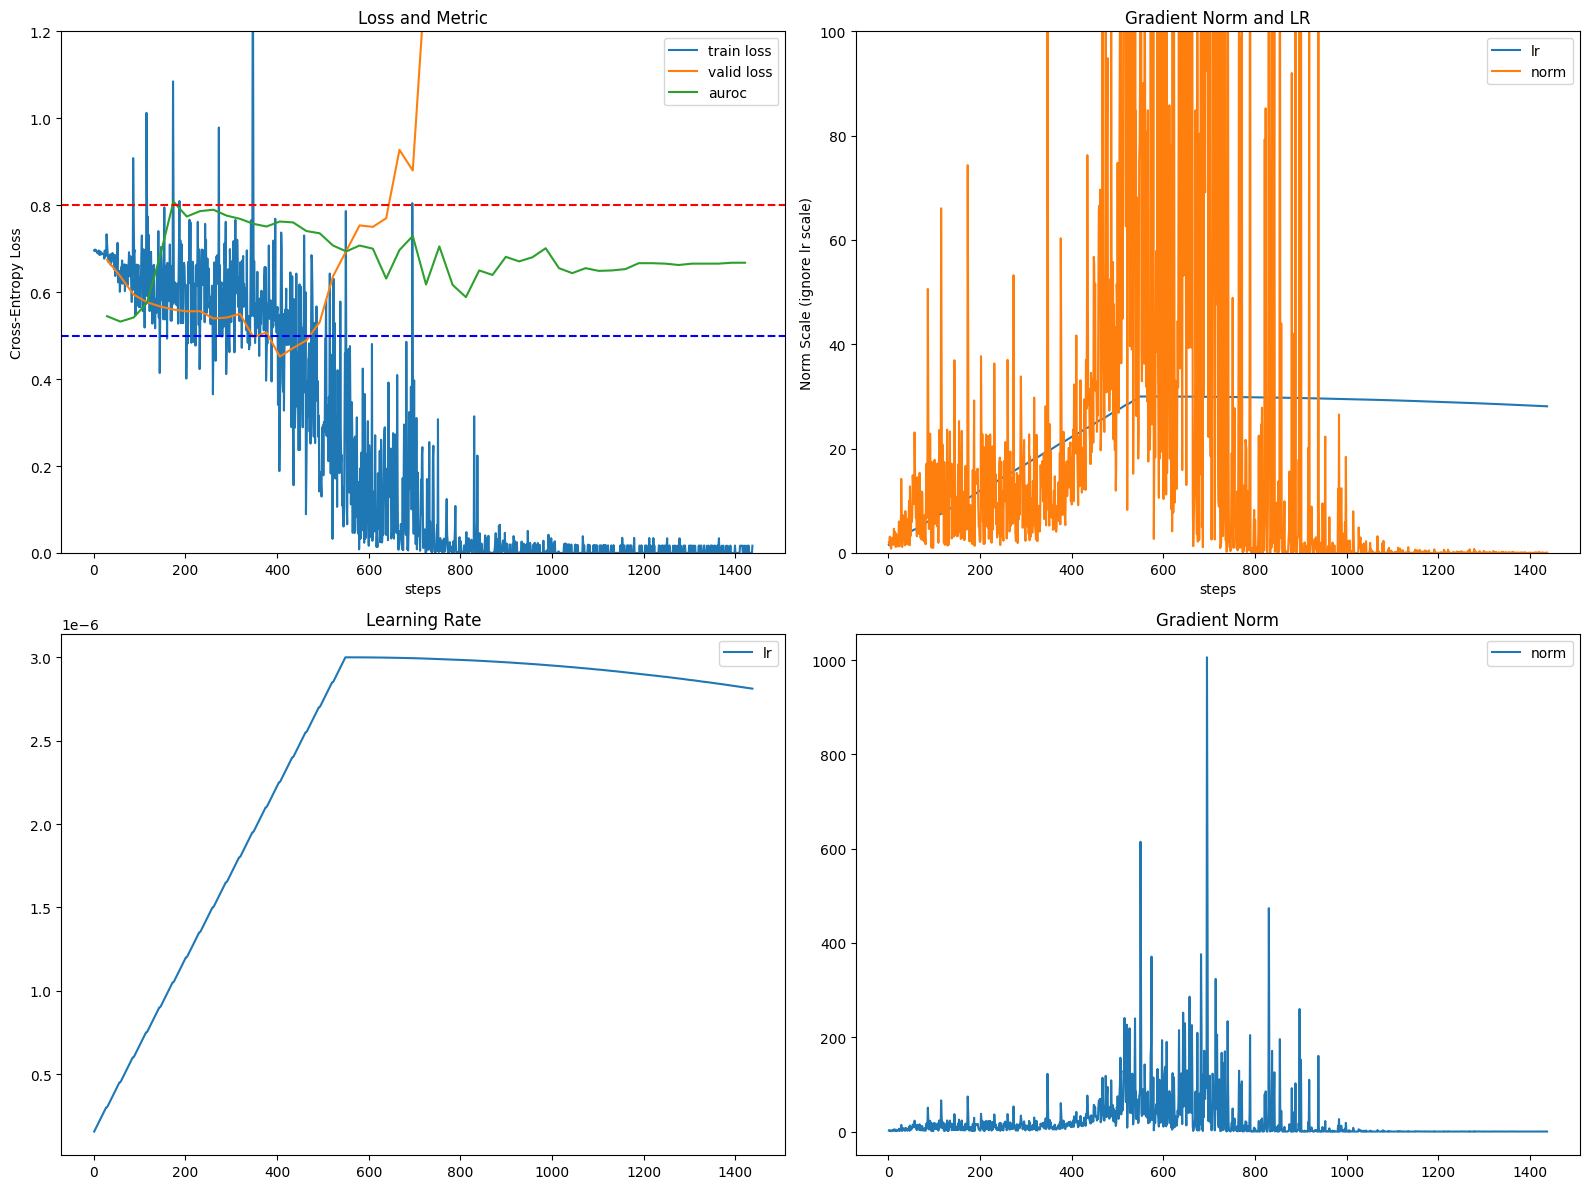

In [ ]:
# plot mid feature fusion

plot_log(
    "2024-11-04_14-16-56_n_embed_512_n_head_8_n_class_2_n_layer_3_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_6_lambda1_0.0_lambda2_1.0_epochs_200_lr_3e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)

Max auroc: 0.7427083333333334


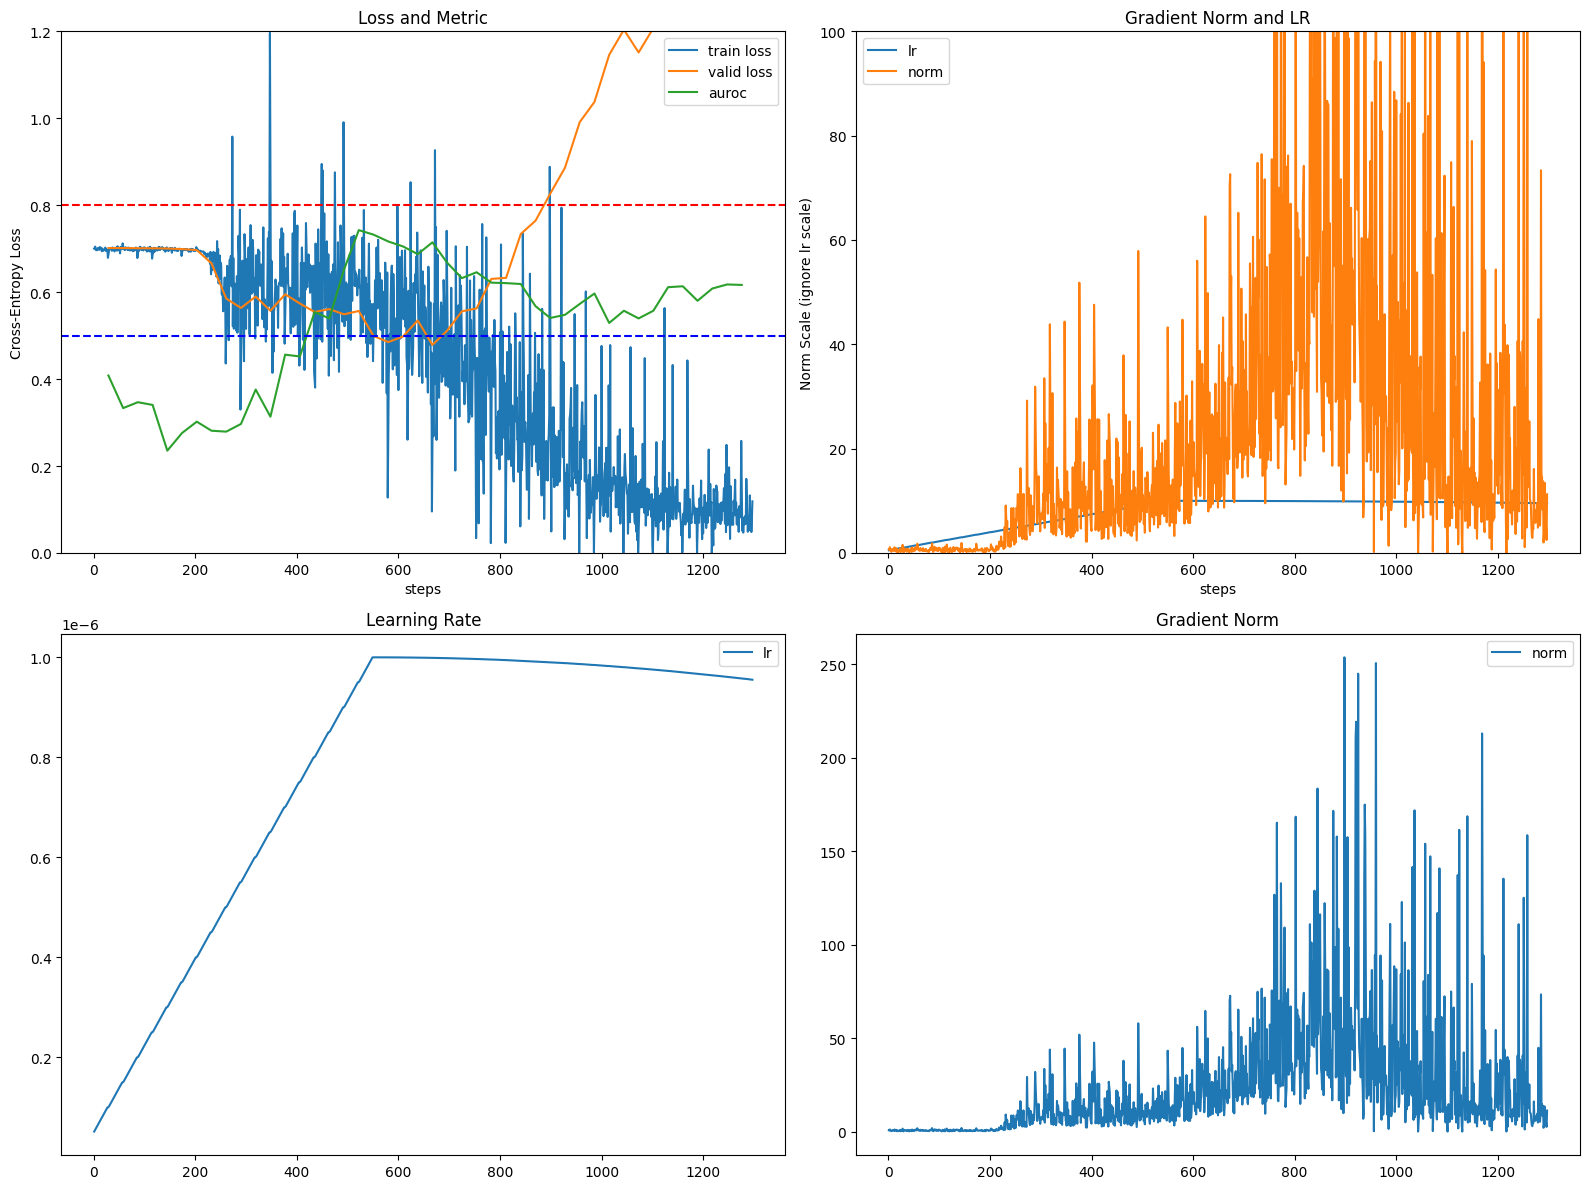

In [ ]:
# stack 2 transformer layer
plot_log(
    "2024-11-04_16-06-43_n_embed_512_n_head_8_n_class_2_n_layer_2_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_7_lambda1_0.0_lambda2_1.0_epochs_200_lr_1e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)

Max auroc: 0.7333333333333333


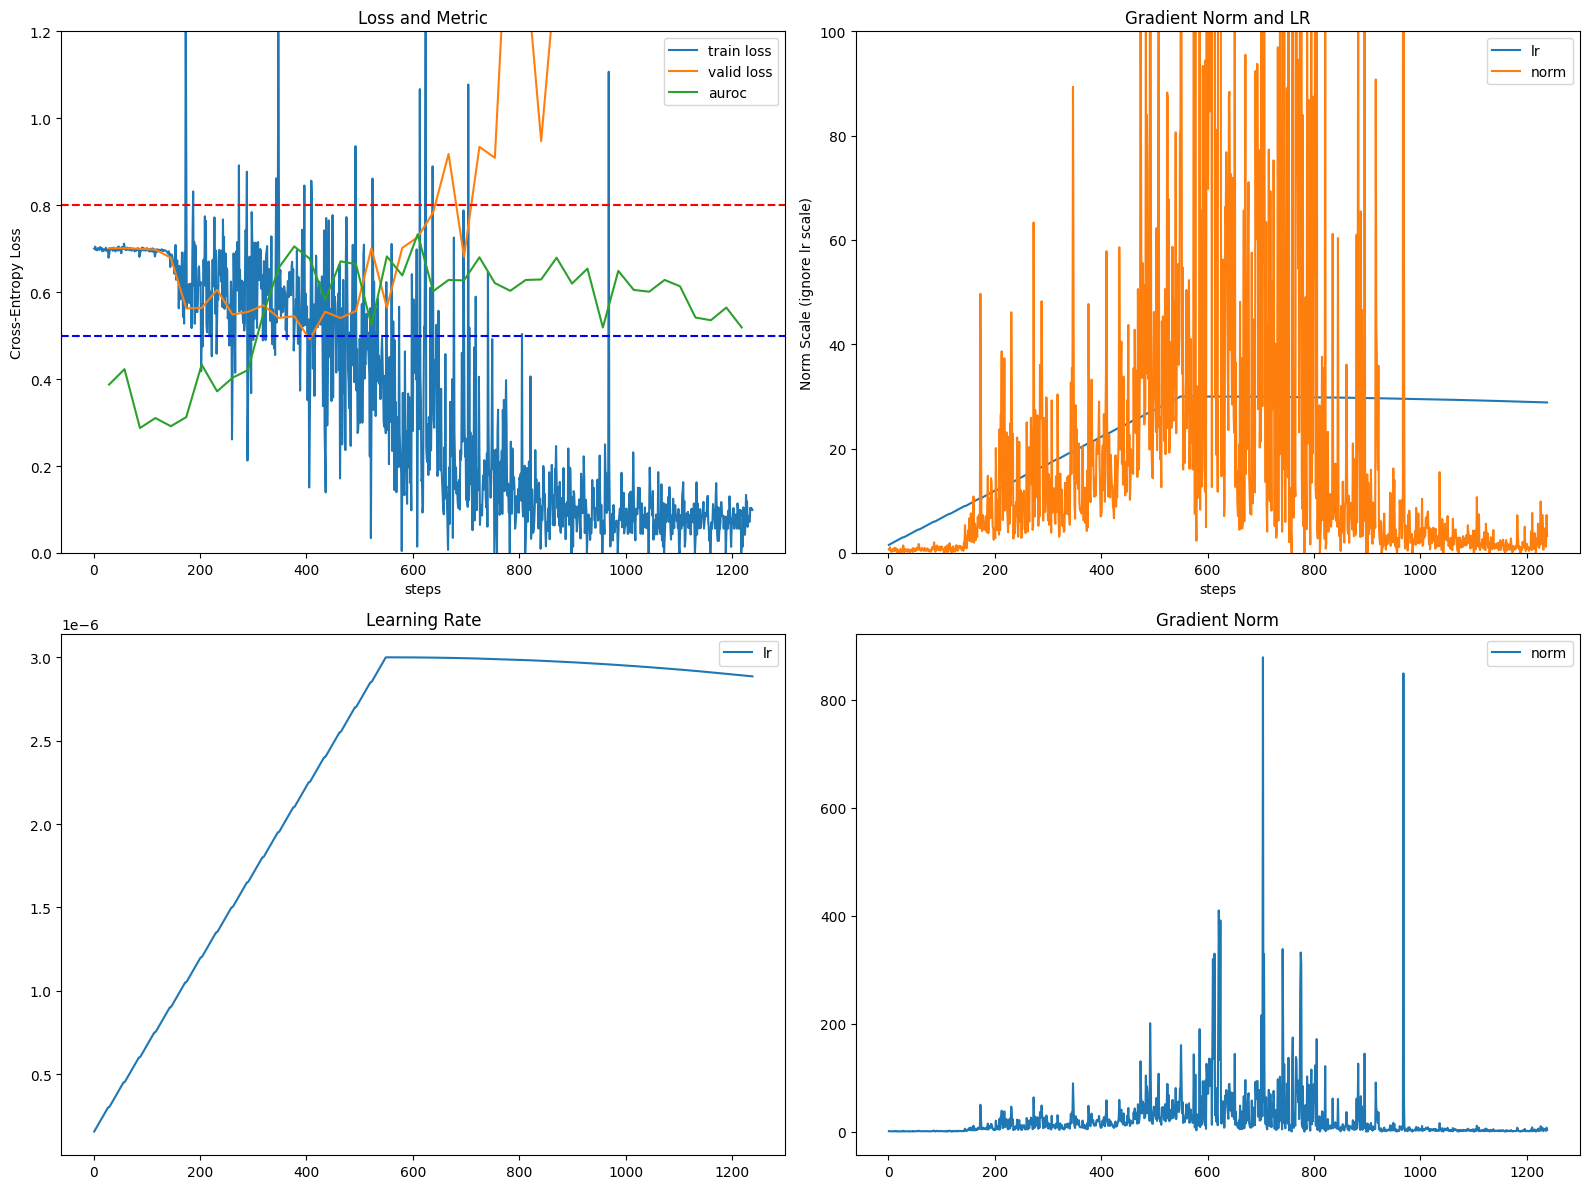

In [ ]:
# n_layer: 2 and lr: 3e-06
plot_log(
    "2024-11-04_17-10-31_n_embed_512_n_head_8_n_class_2_n_layer_2_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_6_lambda1_0.0_lambda2_1.0_epochs_200_lr_3e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)

Max auroc: 0.8083333333333333


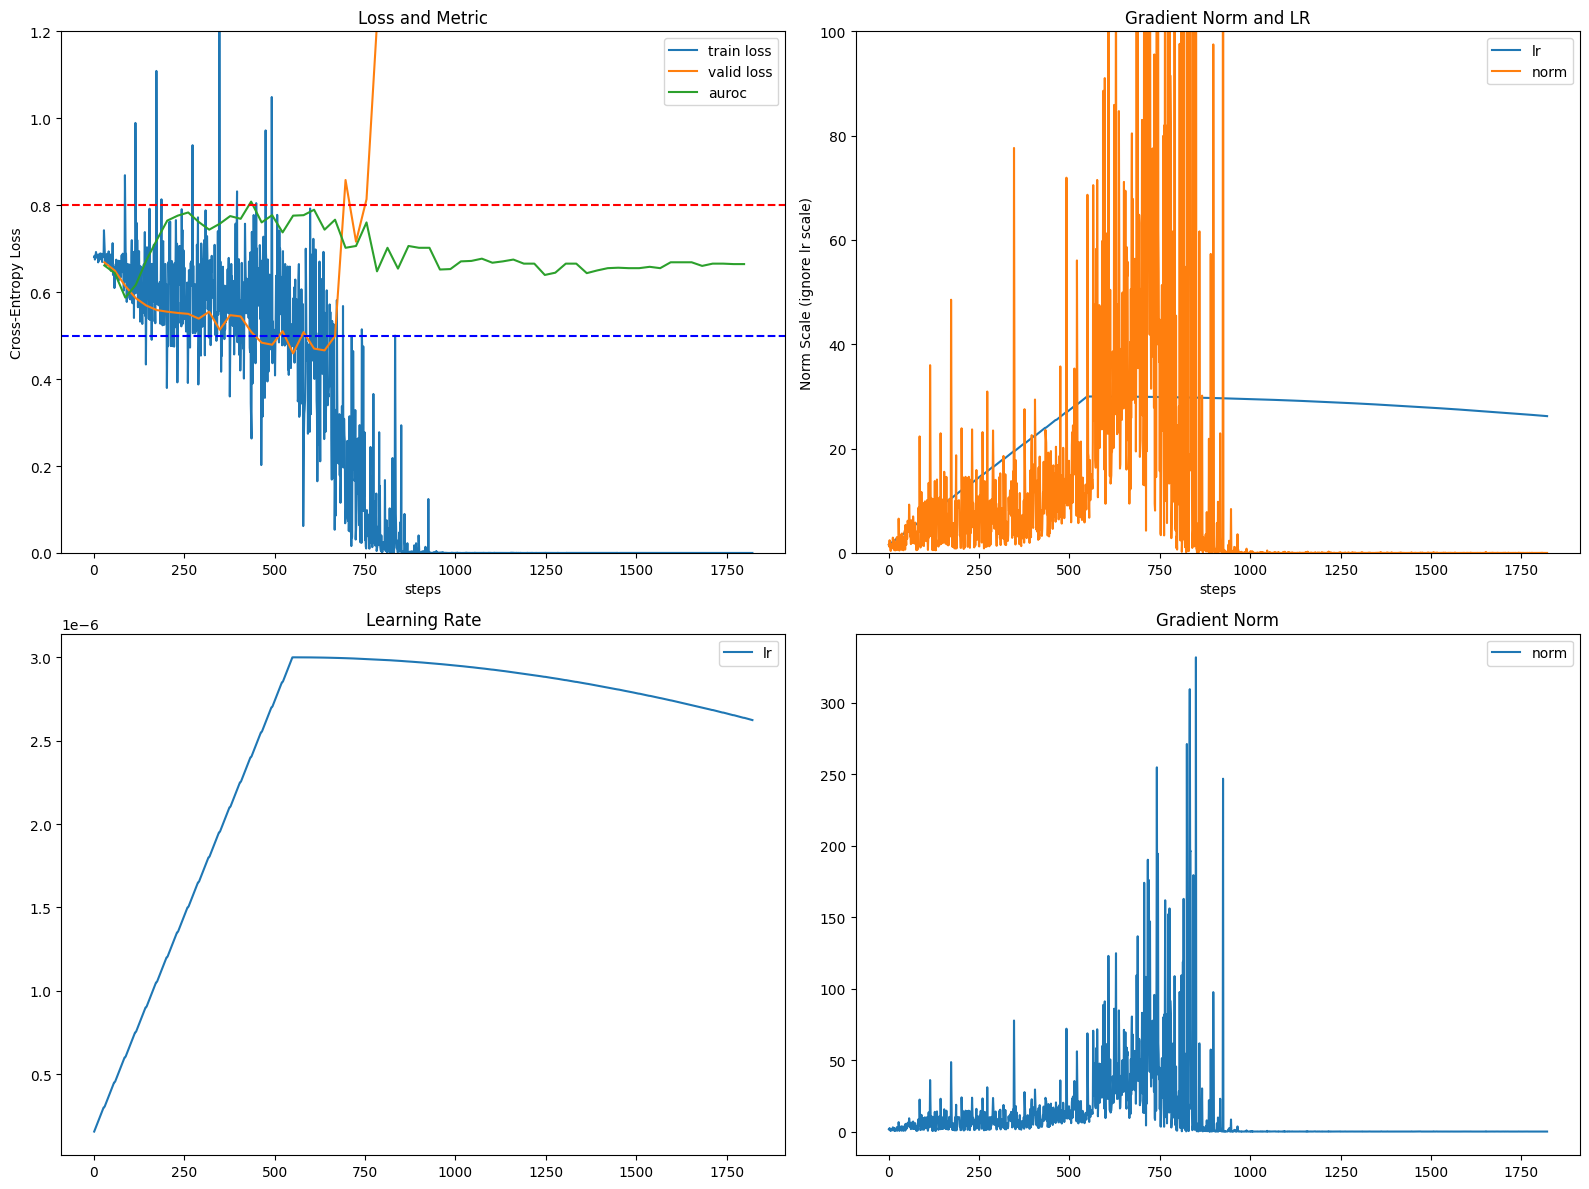

In [29]:
# n_layer: 1 and lr: 3e-06
plot_log(
    "2024-11-05_14-40-00_n_embed_512_n_head_8_n_class_2_n_layer_1_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_6_lambda1_0.0_lambda2_1.0_epochs_200_lr_3e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)

Max auroc: 0.8312500000000002


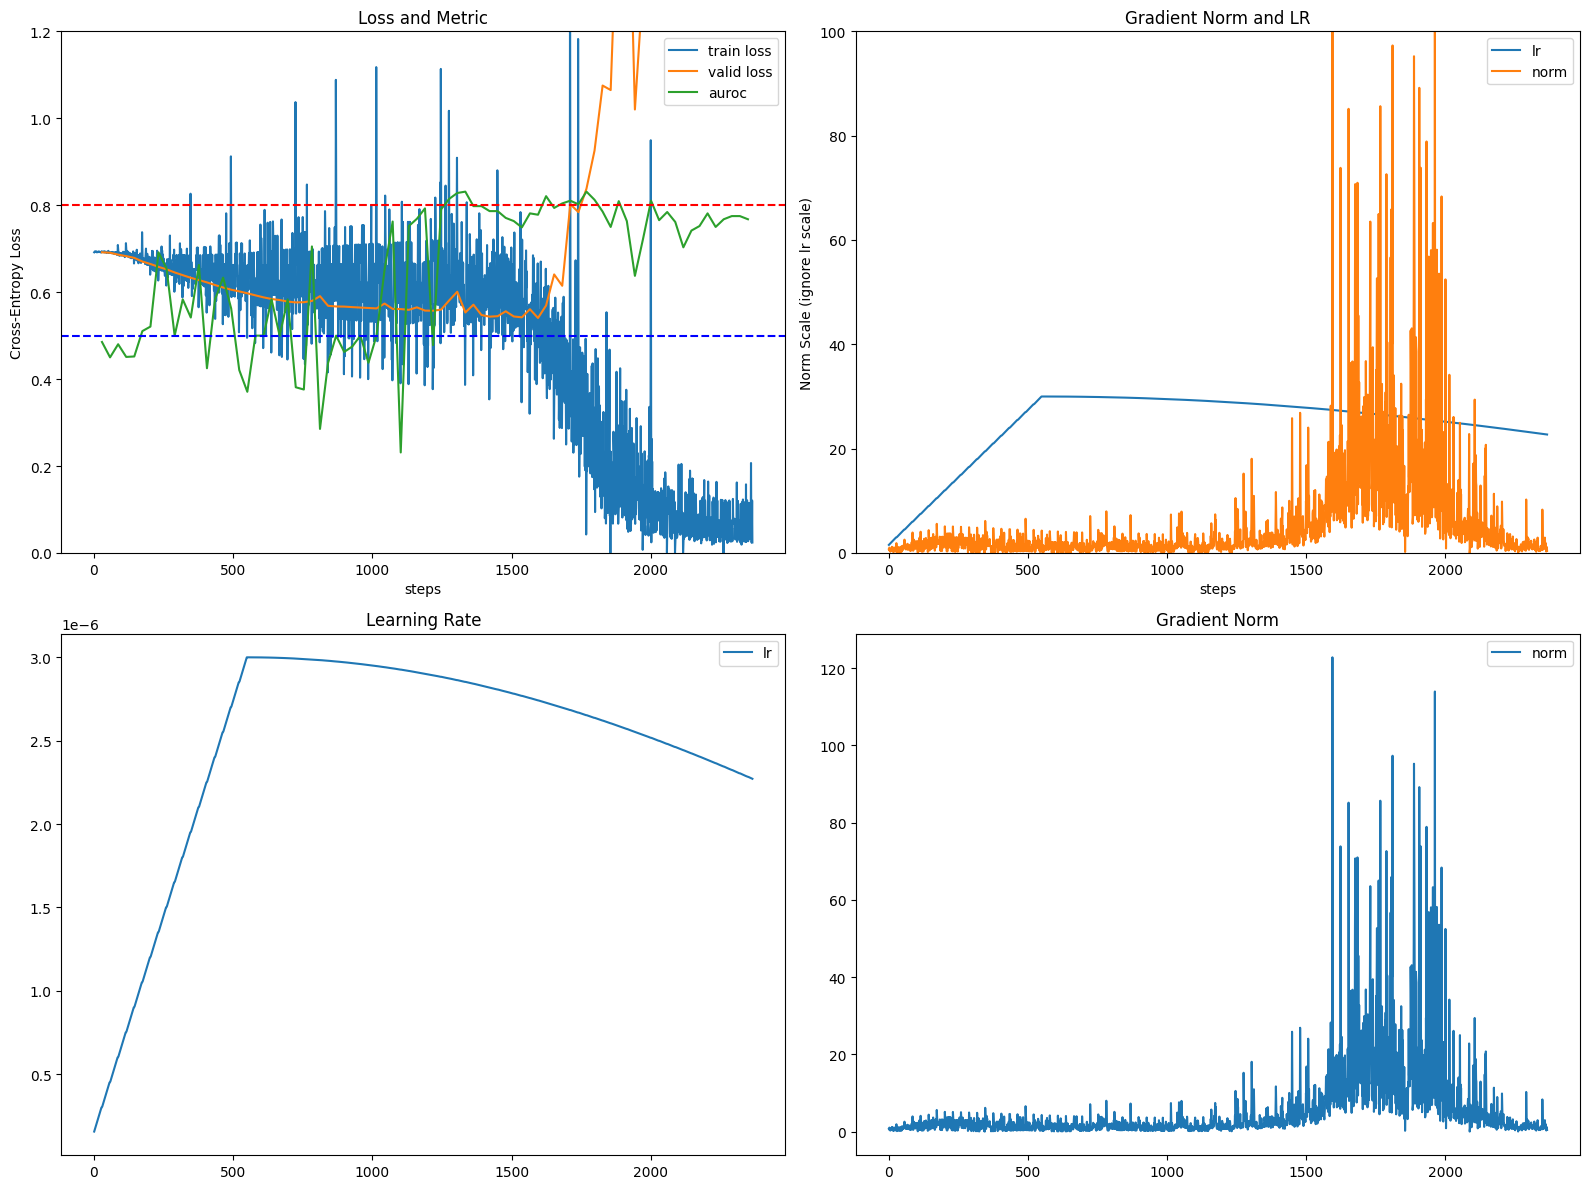

In [4]:
# n_layer:1 mid_feature_fusion
plot_log(
    "2024-11-05_14-49-46_n_embed_512_n_head_8_n_class_2_n_layer_1_n_patch3d_(16, 16, 8)_n_patch2d_(64, 64)_width_2d_1024_width_3d_512_gpu_7_lambda1_0.0_lambda2_1.0_epochs_200_lr_3e-06_batch_1_grad_accum_steps_16_eps_1e-06_resume_None"
)